# 1. 랭그래프(Langgraph)란 어떤 프레임워크인가

## **랭그래프란?**

랭그래프는 LangChain 생태계에서 개발된 그래프 기반 워크플로우 프레임워크로, 복잡한 멀티 에이전트 시스템과 상태 기반 AI 애플리케이션을 개발하는 데 특화되어 있다. 기존의 선형적인 처리 방식과 달리, 노드(점)와 엣지(선)로 구성된 그래프 구조를 통해 비선형적이고 동적인 프로세스를 구성할 수 있다.

랭그래프의 가장 큰 특징은 **사이클(순환 구조)**을 지원한다는 점이다4. 이는 특정 조건에 따라 이전 단계로 돌아가거나 다른 경로를 선택할 수 있음을 의미한다. 예를 들어, 검색 결과가 만족스럽지 않을 때 다시 검색을 수행하거나, 답변의 품질이 낮을 때 재생성을 요청하는 등의 복잡한 로직을 구현할 수 있다.

## **랭체인과의 관계**

랭그래프는 랭체인(LangChain)의 기능을 확장하여 만들어진 프레임워크이다. 두 프레임워크의 주요 차이점을 살펴보면 다음과 같다:

**구조적 차이점:**

- **랭체인**: 선형적이고 직선적인 체인 구조로, 정의된 순서에 따라 작업을 수행한다
    
- **랭그래프**: 노드와 엣지의 연결을 통해 비선형적이고 동적인 프로세스를 구성한다
    

**복잡도와 유연성:**

- **랭체인**: 비교적 간단한 애플리케이션과 직선적인 워크플로우에 적합하다
    
- **랭그래프**: 복잡한 다단계 작업, 멀티 에이전트 협업, 동적인 의사결정 트리 등 복잡한 워크플로우를 관리하는 데 유용하다
    

**상태 관리:**

- **랭체인**: 암시적이고 자동화된 상태 관리를 제공한다
    
- **랭그래프**: 명시적이고 세밀한 상태 관리를 통해 각 단계에서 상태를 직접 제어할 수 있다
    

## **랭그래프 프레임워크의 핵심 기능 정리**

랭그래프의 핵심 기능들을 정리하면 다음과 같다:

**1. 그래프 기반 워크플로우**: 노드와 엣지로 구성된 그래프 구조를 통해 복잡한 처리 흐름을 시각적으로 표현하고 관리할 수 있다.

**2. 상태 기반 처리**: 전체 애플리케이션의 상태를 중앙에서 관리하며, 각 노드가 이 상태를 공유하고 업데이트할 수 있다4.

**3. 조건부 분기**: 실행 중에 조건에 따라 다른 경로를 선택할 수 있는 동적 라우팅 기능을 제공한다.

**4. 순환 구조 지원**: 특정 조건에서 이전 단계로 돌아가거나 반복 실행이 가능한 사이클 구조를 구현할 수 있다4.

**5. 멀티 에이전트 협업**: 여러 AI 에이전트가 협력하여 복잡한 작업을 수행할 수 있는 환경을 제공한다.


# 2. 랭그래프 기본 구조

## **엣지와 노드**

랭그래프의 기본 구조는 **노드(Node)**와 **엣지(Edge)**로 구성된다.

**노드(Node)**: 실제 작업을 수행하는 Python 함수들로, 각각의 노드는 특정 로직을 담당한다. 노드는 현재 상태를 입력으로 받아서 작업을 수행하고, 업데이트된 상태를 반환한다. 예를 들어, LLM 호출, 문서 검색, 데이터 처리 등의 기능을 수행할 수 있다.

**엣지(Edge)**: 노드 간의 연결을 정의하며, 다음에 어떤 노드를 실행할지 결정하는 역할을 한다. 엣지는 워크플로우의 흐름을 제어하고 조건부 라우팅을 가능하게 한다.

## **상태(State)**

상태(State)는 전체 애플리케이션의 현재 상태를 나타내는 공유 데이터 구조이다. 모든 노드가 이 상태에 접근할 수 있으며, 작업 결과에 따라 상태를 업데이트할 수 있다. 상태는 일반적으로 TypedDict 또는 Pydantic BaseModel로 정의된다.

상태의 주요 역할은 다음과 같다:

- **전체 워크플로우의 컨텍스트 유지**: 처리 과정에서 필요한 모든 정보를 중앙에서 관리한다
    
- **노드 간 정보 공유**: 한 노드에서 처리한 결과를 다른 노드에서 활용할 수 있게 한다
    
- **진행 상황 추적**: 현재 어떤 단계에 있는지, 어떤 작업이 완료되었는지 추적한다
    

## **StateGraph**

StateGraph는 랭그래프의 핵심 클래스로, 상태 기반의 계산 그래프를 정의하는 역할을 한다. StateGraph는 에이전트의 수명 주기 전반에 걸쳐 상태가 유지되도록 하며, 그래프의 노드들이 이 상태를 업데이트할 수 있게 한다.

StateGraph의 초기화 과정에서는 상태 정의를 전달하며, 이후 노드들이 키-값 형태로 상태의 속성을 반환하게 된다.

## **랭그래프에서 상태관리**

랭그래프에서 상태 관리는 두 가지 방식으로 이루어진다:

**1. 완전 재정의 방식**: 노드가 속성의 새 값을 반환하여 기존 값을 완전히 대체하는 방식이다.

**2. 업데이트 방식**: 기존 속성 값에 새로운 값을 추가하는 방식으로, `operator.add`와 같은 어노테이션을 사용하여 구현한다. 예를 들어, 메시지 리스트에 새로운 메시지를 추가할 때 사용된다.

# 3. 랭그래프 구현

## **상태(State) 구조 정의**

- 랭그래프를 구현하기 위해서는 먼저 State 클래스를 정의 한다.
    - State는 `TypedDict`를 상속받아 정의하며, 각 속성에 대해 reducer 함수를 지정할 수 있다. 
    - Reducer 함수는 기존 값과 새 값을 어떻게 결합할지 정의한다 (예: 리스트 추가, 값 덮어쓰기 등)
- State는 graph의 노드들이 공유할 데이터이다.
- State 클래스는 state의 속성들을 정의하는 스키마(schema)이다.


```python
from typing import TypedDict
class MyState(TypedDict):
     counter: int    
     messages: list 
```

## **노드 정의**

노드는 실제 작업을 수행하는 Python 함수로 정의된다. 각 노드 함수는 현재 상태를 입력으로 받아 처리 후 업데이트된 상태를 반환한다.

```python
def increment_counter(state):    
     return {"counter": state["counter"] + 1} 
     
def process_message(state):
    # 메시지 처리 로직    
    new_message = "처리된 메시지"    
    return {"messages": state["messages"] + [new_message]}
```


## **엣지 정의**

엣지는 노드 간의 연결을 정의하며, `add_edge` 메서드를 사용하여 추가한다. 기본적인 엣지는 한 노드에서 다른 노드로의 직접적인 연결을 의미한다.

```python
graph.add_edge("node1", "node2") 
graph.add_edge("node2", "node3")
```

## **그래프 구성**

- 노드와 엣지를 정의한 후에는 그래프를 구성하고 컴파일해야 한다. 
  - `StateGraph`를 생성하고 그래프에 노드들을 추가한다.
  - 각 노드들을 연결하여 엣지를 추가한다. 이 과정에서 시작점과 종료점을 설정한다.
  - 컴파일을 통해 그래프의 구조를 검증한다.

```python
from langgraph.graph import START, END
from langgraph.graph import StateGraph 

# StateGraph 생성
graph = StateGraph(MyState)

# 노드 추가 
graph.add_node("increment", increment_counter) 
graph.add_node("process", process_message) 
# 엣지 추가 
graph.add_edge(START, "increment") 
graph.add_edge("increment", "process") 
graph.add_edge("process", END) 
# 그래프 컴파일 
app = graph.compile(
```

## **그래프 실행**

- 실행 시에는 초기 상태(Initial state)를 제공하여 그래프를 실행한다.   
- 그래프는 이 초기 상태부터 시작하여 정의된 노드들을 순차적으로 실행하며 상태를 업데이트한다.

```python
result = app.invoke({"counter": 0, "messages": []}) 
print(result)
```

In [1]:
# %pip install langgraph

In [1]:
from langchain_openai import ChatOpenAI
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

from typing_extensions import TypedDict
from typing import Annotated

from dotenv import load_dotenv
load_dotenv()

True

In [2]:
######################
# 이름 추가, 나이 추가, 주소를 추가하는 노드
#   - Langgraph에서 노드와 엣지의 흐름 + 상태관리개념을 살펴보자.
######################

# 1. 상태(State) 정의 - 노드들이 공유할 state값들을 설계
class UserInfoState(TypedDict):
    name: str
    age: int
    address: str

In [6]:
# 노드 정의 -> 함수(callable)
# 입력: State, 출력: State에 저장할 속성 (State)
def add_name(state: UserInfoState):
    print("add_name:", state)
    return {"name":"홍길동"} # UserInfoState의 field 이름: "저장할 값"

def add_age(state:UserInfoState):
    print("add_age:", state)
    return {"age":30}

def add_address(state:UserInfoState):
    print("add_address:", state)
    return {"address":"무지개"}

리턴을 할 때 "홍길동"은 name이야 하고 알려줘야함 => dict

In [8]:
# StateGraph를 구성.
workflow = StateGraph(UserInfoState)

# 노드 추가
workflow.add_node("add_name", add_name)
workflow.add_node("add_age", add_age)
workflow.add_node("add_address", add_address)

# 엣지 추가 (노드간의 연결) -> 시작: START 노드
workflow.add_edge(START, "add_name")
workflow.add_edge("add_name", "add_age")
workflow.add_edge("add_age", "add_address")
workflow.add_edge("add_address", END)

# State graph를 컴파일 - 실행 가능한 상태로 만든다. (그래프 검증, 최적화)
graph = workflow.compile()

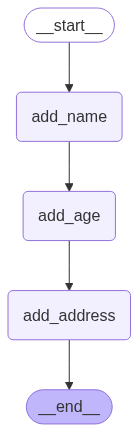

In [10]:
# 시각화
from IPython.display import Image
display(Image(graph.get_graph().draw_mermaid_png()))
# jupyter lab에서 할 때는 display를 생략 가능함. 다만 로컬에서 할 때는 display를 해야 화면에 뜸.

In [11]:
# 실행
res = graph.invoke({}) # 첫번째 노드에 전달할 state를 dictionary로 전달. 

add_name: {}
add_age: {'name': '홍길동'}
add_address: {'name': '홍길동', 'age': 30}


- `res = graph.invoke({})`: 빈 딕셔너리를 넣는다 -> 전달할 값이 없는채로 들어감. 
- `add_age`는 `add_name`을 거치며 `name:홍길동` 정보가 들어간 딕셔너리를 받음

In [12]:
# 실행
res = graph.invoke({'age':100}) # 첫번째 노드에 전달할 state를 dictionary로 전달. 

add_name: {'age': 100}
add_age: {'name': '홍길동', 'age': 100}
add_address: {'name': '홍길동', 'age': 30}


`age:100`이라고 처음에 받았으나 `add_age`를 거치면서 `age:30`을 리턴받기 때문에 바뀜

근데 저는 바꾸기 싫어여.. 추가하고 싶음 => 리스트로 받아서 추가할 수 있게 만든다.   
기본적으로는 바뀐다. 

In [13]:
res

{'name': '홍길동', 'age': 30, 'address': '무지개'}

In [15]:
res = graph.invoke({'혈액형':'B'}) # State에 없는 Field는 전달 안 됨.

add_name: {}
add_age: {'name': '홍길동'}
add_address: {'name': '홍길동', 'age': 30}


설계도에 혈액형이 없어서 안 들어감.

In [18]:
######################
# Chatbot
######################
# 상태(State) 클래스 정의
#  노드들이 공유할 state값들을 정의하는 클래스(타입)
class State(TypedDict):
    # state에 저장할 값(속성, state) 들을 정의
    messages: Annotated[list, add_messages]  # 변수: Annotated[변수타입, 설명]

    # add_messages(left:list, right:list) : return left + right

In [19]:
model = ChatOpenAI(model='gpt-4.1-mini')
############################
# 노드 정의 
# 노드 == 기능 == 함수(callable): 파라미터로 State 타입을 선언. 
def chatbot(state:State):
    # state: Dictionary - key: State클래스에 정의한 변수들.
    print("chatbot: state type:", type(state), state)
    # messages를 llm에 query로 전달.
    response = model.invoke(state['messages'])  #invoke(str 또는 Message List)
    # response를 state에 저장. -> dictionary로 구성 {저장할 state의 이름: 저장할 값}
    return {"messages": [response]}  # 리턴 -> State에 저장.

In [20]:
# 그래프를 구성 (StateGraph)
## 노드와 엣지 + state
workflow = StateGraph(State)

# graph(workflow)에 노드를 추가. 이름-함수
workflow.add_node("chatbot", chatbot)

# graph에 엣지를 구성. 엣지: 노드와 노드를 연결
## START 노드 - 엣지 구성 - (END 노드:생략가능)
workflow.add_edge(START, "chatbot")  # 시작노드(이름) -> 도착노드(이름)
workflow.add_edge("chatbot", END)

# 구성을 완료하면 compile -> 그래프 최적화를 하고 실행할 수있도로 만드는 작업.
graph = workflow.compile()

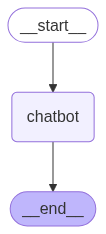

In [21]:
#########################################
# 그래프 구조 시각화 -> 실행 흐름을 확인
from IPython.display import Image
Image(graph.get_graph().draw_mermaid_png())

In [23]:
############### 
# 실행 - graph.invoke()
###############
from langchain_core.messages import HumanMessage
query = "Langgraph에 대해서 알려줘."

init_state = {"messages":[HumanMessage(content=query)]}

resp = graph.invoke(init_state)  # State에 넣어줄 초기값 -> 첫번째 노드가 사용.

chatbot: state type: <class 'dict'> {'messages': [HumanMessage(content='Langgraph에 대해서 알려줘.', additional_kwargs={}, response_metadata={}, id='d9dbaa3d-865c-4d7c-98c5-39e658057fe0')]}


In [24]:
type(resp)

langgraph.pregel.io.AddableValuesDict

In [25]:
resp['messages']

[HumanMessage(content='Langgraph에 대해서 알려줘.', additional_kwargs={}, response_metadata={}, id='d9dbaa3d-865c-4d7c-98c5-39e658057fe0'),
 AIMessage(content='Langgraph는 텍스트 기반 데이터 처리와 자연어 처리(NLP)에 특화된 도구 또는 플랫폼을 의미할 수 있습니다. 다만, 제가 알고 있는 최신 정보(2024년 6월 기준)에는 "Langgraph"라는 명칭을 가진 특정 제품이나 서비스에 대한 자세한 정보가 없습니다.\n\n만약 Langgraph가 최근에 출시된 신제품이거나 특정 기업 또는 커뮤니티에서 사용하는 내부 도구라면, 좀 더 구체적인 설명이나 활용 목적, 관련 링크 등을 알려주시면 더 정확한 정보를 제공해드릴 수 있습니다.\n\n추가로, "Langgraph"라는 이름에서 유추해보면, 언어(Language)와 그래프(Graph)를 결합한 개념일 가능성이 있는데, 이는 자연어 처리에서 텍스트를 그래프 형태로 표현하거나, 언어 데이터를 그래프 기반으로 분석하는 기술일 수 있습니다. 예를 들어, 단어 간의 관계를 그래프로 표현하여 의미 분석, 지식 그래프 구축, 문서 요약 등에 활용될 수 있습니다.\n\n좀 더 구체적인 정보를 원하시면 추가 질문 부탁드립니다!', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 235, 'prompt_tokens': 14, 'total_tokens': 249, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'ca

In [26]:
print(resp['messages'][-1].content)

Langgraph는 텍스트 기반 데이터 처리와 자연어 처리(NLP)에 특화된 도구 또는 플랫폼을 의미할 수 있습니다. 다만, 제가 알고 있는 최신 정보(2024년 6월 기준)에는 "Langgraph"라는 명칭을 가진 특정 제품이나 서비스에 대한 자세한 정보가 없습니다.

만약 Langgraph가 최근에 출시된 신제품이거나 특정 기업 또는 커뮤니티에서 사용하는 내부 도구라면, 좀 더 구체적인 설명이나 활용 목적, 관련 링크 등을 알려주시면 더 정확한 정보를 제공해드릴 수 있습니다.

추가로, "Langgraph"라는 이름에서 유추해보면, 언어(Language)와 그래프(Graph)를 결합한 개념일 가능성이 있는데, 이는 자연어 처리에서 텍스트를 그래프 형태로 표현하거나, 언어 데이터를 그래프 기반으로 분석하는 기술일 수 있습니다. 예를 들어, 단어 간의 관계를 그래프로 표현하여 의미 분석, 지식 그래프 구축, 문서 요약 등에 활용될 수 있습니다.

좀 더 구체적인 정보를 원하시면 추가 질문 부탁드립니다!


# 4. 다양한 엣지

## **기본 엣지**

- 기본 엣지(Normal Edge)는 한 노드에서 다른 노드로의 직접적인 연결을 의미한다. 이는 가장 단순한 형태의 연결로, 이전 노드의 작업이 완료되면 자동으로 다음 노드로 이동한다.
- 기본 엣지는 다음과 같은 특징을 가진다:
  - **고정된 흐름**: 항상 동일한 다음 노드로 이동한다      
  - **단순한 구조**: 복잡한 조건 없이 순차적으로 실행된다      
  - **예측 가능한 동작**: 실행 전에 전체 흐름을 예측할 수 있다    

## **조건부 엣지와 라우팅**

- 조건부 엣지(Conditional Edge)는 특정 조건에 따라 다음에 실행할 노드를 동적으로 결정하는 기능이다. 이는 랭그래프의 가장 강력한 기능 중 하나로, 복잡한 의사결정 로직을 구현할 수 있게 한다.
- 조건부 엣지를 구현하기 위해서는 세 가지 구성 요소가 필요하다:
    - **1. 소스 노드(Source Node)**
      -  조건 평가가 시작될 노드의 이름이다.
    - **2. 조건 함수(Condition Function)**
      - 현재 상태를 입력받아 문자열을 반환하는 함수로, 다음에 실행할 노드를 결정하는 로직을 포함한다.
    - **3. 조건부 엣지 매핑(Conditional Edge Mapping)**
      -  조건 함수의 반환값과 다음 노드 이름을 매핑하는 딕셔너리이다.
```python
def relevance_check(state):     
    # 관련성 체크 로직    
    if state["relevance_score"] > 0.8:        
        return "grounded"    
    else:        
        return "not_grounded" 
        
graph.add_conditional_edges(
    "llm_answer",     # 소스 노드    
    relevance_check,  # 조건 함수    
    {        
        "grounded": END,  # 조건함수반환값:이동할 노드 (grounded 이면 END 노드로 이동)
        "not_grounded": "retrieve"  # not_grounded 이면 retrieve 노드로 이동
    } 
)
```

## **반복 구조**

- 랭그래프의 가장 큰 장점 중 하나는 반복 구조(순환 구조)를 지원한다는 점이다. 이를 통해 특정 조건이 만족될 때까지 작업을 반복하거나, 품질이 향상될 때까지 개선 과정을 반복할 수 있다.
- 반복 구조의 활용 예시:
  - **검색 품질 개선**
    - 검색 결과가 만족스럽지 않을 때 쿼리를 재작성하여 다시 검색한다      
  - **답변 품질 향상**
    - 생성된 답변의 품질이 낮을 때 다시 생성하거나 개선한다      
  - **할루시네이션 방지**
    -  답변이 검색된 문서와 관련성이 낮을 때 재생성을 요청한다

In [27]:
from langchain_tavily import TavilySearch

tool = TavilySearch(max_results=2)
tools = [tool]
tool_model = ChatOpenAI(model="gpt-4.1").bind_tools(tools)
tool_model

RunnableBinding(bound=ChatOpenAI(client=<openai.resources.chat.completions.completions.Completions object at 0x000002D4A0676AB0>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x000002D4A08AD7F0>, root_client=<openai.OpenAI object at 0x000002D490D1CF50>, root_async_client=<openai.AsyncOpenAI object at 0x000002D492077C80>, model_name='gpt-4.1', model_kwargs={}, openai_api_key=SecretStr('**********')), kwargs={'tools': [{'type': 'function', 'function': {'name': 'tavily_search', 'description': 'A search engine optimized for comprehensive, accurate, and trusted results. Useful for when you need to answer questions about current events. It not only retrieves URLs and snippets, but offers advanced search depths, domain management, time range filters, and image search, this tool delivers real-time, accurate, and citation-backed results.Input should be a search query.', 'parameters': {'properties': {'query': {'description': 'Search query to look up', 't

In [ ]:
class State(TypedDict):
    messages: Annotated[list, add_messages]
    # add_messages: 상태값을 저장하는 방법을 정의한 함수 -> reducer 라고 한다.

# 노드 정의
## 챗봇 노드
def chatbot(state:State):
    response = tool_model.invoke(state['messages'])
    return {"messages":[response]}

## Tool을 호출하는 노드.
class CustomToolNode:
    def __init__(self, tools): # Tool List를 받는다.
        # 속성으로 툴이름 저장
        self.tools_by_name = {tool.name: tool for tool in tools}  # dict[tool이름:Tool객체]

    def __call__(self, inputs:State):  # inputs: State
        if messages := inputs.get("messages", []):
            message = messages[-1]  # tool calls가 있는 AI Message  (messages는 메세지들이 누적되어 있으므로 마지막 Message 객체를 가져온다.)
        else:
            raise ValueError("No messages found in inputs.")
        
        outputs = []
        for tool_call in message.tool_calls:
            tool_message = self.tools_by_name[tool_call['name']].invoke(tool_call)
            outputs.append(tool_message)

        return {"messages": outputs}
    
tool_node = CustomToolNode(tools)

## Tool들을 호출하는 Prebuilt Node
from langgraph.prebuilt import ToolNode # === CustomToolNode와 같음. 
tool_node = ToolNode(tools) # [tool, tool, ...]

############################
# 조건부 엣지 함수
# 조건에 따라 실행할 다음 노드의 이름/식별자를 반환.

def custom_tools_condition(state:State):
    if messages := state.get("messages", []):
        ai_message = messages[-1]
    else:
        raise Exception("State에 message가 없습니다.")
    if hasattr(ai_message, "tool_calls") and len(ai_message.tool_calls)>0:
        # AIMessage -> tool_calls가 있고, tool_calls에 한 개 이상의 tool_call 값이 있다면
        return "tools" # 다음 노드의 이름 반환.
    else:
        return END # "__end__"
    
from langgraph.prebuilt import tools_condition # == custom_tools_condition 와 동일한 함수 
# add_conditional_edge()에 이 함수를 넣으면 된다. 

In [29]:
# 참고! hasattr()
# 객체에 특정 attribute
# hasattr(): 가 있는지 여부
# getattr(): 의 값을 조회
# setattr(): 에 값을 할당
t = CustomToolNode(tools)
hasattr(t, "tools_by_name"), hasattr(t, "tools_name")
getattr(t, "tools_by_name")             # t.tools_by_name: tools_by_name이 가지고 있는 값을 조회
setattr(t, "name", "툴실행 노드")         # t.name = "툴 실행 노드" 
getattr(t, "name")

# 사용하는 이유? 문자열로 인스턴스 변수를 다룰 수 있기 때문이다!

'툴실행 노드'

In [30]:
# Graph 정의
workflow = StateGraph(State)

# 노드들 추가.
workflow.add_node("chatbot", chatbot)
workflow.add_node("tools", tool_node)

# 노드 연결 --> 엣지
workflow.add_edge(START, "chatbot")
workflow.add_conditional_edges("chatbot", 
                               custom_tools_condition,
                               {"tools": "tools", END:END})
workflow.add_edge("tools", "chatbot")
graph = workflow.compile()

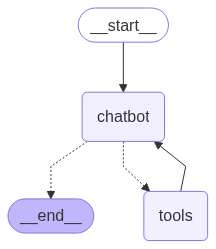

In [31]:
Image(graph.get_graph().draw_mermaid_png())

In [32]:
query = "Langgraph가 뭔지 설명해줘. 검색을 해서 정확한 정보 알려줘."
init_state = {"messages":[HumanMessage(content=query)]}
resp = graph.invoke(init_state)

In [33]:
resp
print(resp["messages"])

[HumanMessage(content='Langgraph가 뭔지 설명해줘. 검색을 해서 정확한 정보 알려줘.', additional_kwargs={}, response_metadata={}, id='9b8c7b0e-a01d-424a-9669-569be055db8d'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_6QNXuomBRjttxZn1YrpcsALF', 'function': {'arguments': '{"query":"Langgraph란 무엇인가","search_depth":"advanced"}', 'name': 'tavily_search'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 25, 'prompt_tokens': 786, 'total_tokens': 811, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-2025-04-14', 'system_fingerprint': 'fp_51e1070cf2', 'id': 'chatcmpl-BlQJe60DLleNVOSpSyHKr8zZuDNgA', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--0408f600-7bda-42ee-87c3-f9654e097b66-0', tool_calls=[{'name': 'tavily_search', 'args'

# 5. 랭그래프에서 메모리 관리

**랭그래프에서 메모리 관리**는 **체크포인터(Checkpointer)** 기능을 통해 구현된다. 이는 복잡한 대화형 AI 시스템 구축에 필수적인 기능으로, 상태를 저장하고 관리하는 핵심 역할을 한다.

- **체크포인터의 주요 기능:**
    - **1. 상태 지속성**
      -  그래프 실행 중간에 상태를 저장하여 나중에 복원할 수 있다.
    - **2. 대화 기록 유지**
      - 이전 대화 내용을 기억하여 연속적인 대화가 가능하다.
    - **3. 오류 복구**
      -  실행 중 오류가 발생했을 때 이전 상태로 돌아갈 수 있다.
-   구현
    -  Graph를 컴파일할 때 checkpointer객체를 설정한다.
    - Graph 실행시 대화를 저장할 때 사용할 thread_id를 `RunnableConfig`를 이용해 전달한다.

```python

from langgraph.checkpoint.memory import MemorySaver
from langgraph.checkpoint.sqlite import SqliteSaver

# 메모리 체크포인터 생성
checkpointer = MemorySaver()
# SQLite 체크포인터 생성
# checkpointer = SqliteSaver.from_conn_string("checkpoints.db")

# 그래프에 연결
graph = workflow.compile(checkpointer=checkpointer)

# graph 호출시 thread_id 전달 (사용자 구분)
config = {"configurable": {"thread_id": "user-123"}}
response = graph.invoke({"messages": [user_message]}, config)
```

In [36]:
from langchain_openai import ChatOpenAI
from langchain_core.messages import HumanMessage
from langchain.prompts import ChatPromptTemplate
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langgraph.checkpoint.memory import MemorySaver
from langgraph.prebuilt import ToolNode, tools_condition
from dotenv import load_dotenv
from typing_extensions import TypedDict
from typing import Annotated

from tools import search_web

load_dotenv()

True

In [37]:
class State(TypedDict):
    messages: Annotated[list, add_messages]

In [51]:
# 노드 정의
from datetime import date
from textwrap import dedent
class ChatbotNode:

    def __init__(self, tools, model_name:str="gpt-4.1-mini"):
        prompt = ChatPromptTemplate(
            [
                ("system", dedent("""
                    당신은 다양한 지식을 제공하는 AI 어시스턴트입니다. 
                    주요 목표는 사용자의 요청에 대한 정확한 정보를 이해하기 쉽게 설명하는 것입니다.
                    
                    # Instruction:
                    1. 정확한 답변을 위해 웹 검색이 필요하거나 최신 정보를 얻고 싶을 때는 **search_web 도구**를 사용하십시오. 이 도구는 인터넷 검색을 통해 정보를 검색해서 제공합니다.
                    2. 최신 정보를 제공해야 할 때는 {today} 를 기준으로 합니다.
                    3. 검색 결과를 기반으로 명확하고 간결한 답변을 제공하십시오.
                    4. 최종 응답은 챗봇과 같은 대화형 스타일을 유지하세요. 친근하고 쉽고 자연스럽게 다변하되 전문성을 보이는 어조를 유지하세요.

                    각 도구들을 결합해서 사용자의 요청에 정확한 대답을 하세요.
                    항상 가장 최신의 정확한 정보를 제공하기 위해 노력하세요.
                    """)),
                ("human", "{query}")
            ],
            partial_variables={"today": date.today().strftime('%Y년 %m월 %d일')}
        )
        tool_model = ChatOpenAI(model="gpt-4.1").bind_tools(tools)
        self.chain = prompt | tool_model

    def __call__(self, input_state:State):  # 노드가 호출될 때 실행될 함수 
        response = self.chain.invoke({"query":input_state["messages"]})
        return {"messages": [response]}

tools = [search_web]
chatbot_node = ChatbotNode(tools)


```python
   def __call__(self, input_state:State):  # 노드가 호출될 때 실행될 함수 
        response = self.chain.invoke({"query":input_state["messages"]})
```
input_state["messages"][-1] 해버리면 저장된 메세지 이력 중 마지막 것만 들어가서 대화 이력을 기억하지 못함. 

In [52]:
# 툴 호출 처리 Node
from langgraph.prebuilt import ToolNode

tool_node = ToolNode(tools) # 위 예제의 CustomToolNode와 동일한 역할.

In [53]:
from langgraph.prebuilt import tools_condition # custom_tools_condition 함수와 동일한 역할. 

# Graph 구성
workflow = StateGraph(State)

# 노드 추가
workflow.add_node("chatbot", chatbot_node)
workflow.add_node("tools", tool_node)

# 엣지 연결
workflow.add_edge(START, "chatbot")
# chatbot -(tool_calls 여부에 따라)-> END | tool_node (분기 -> add_conditional_edges() 사용)
workflow.add_conditional_edges("chatbot", tools_condition, {"tools":"tools", END:END}) 
# tools_condition에 툴 이름을 주었을 때 -> 조건부 분기
workflow.add_edge("tools", "chatbot")

`workflow.add_conditional_edges("chatbot", tools_condition, {"tools":"tools", END:END})`: chatbot -> tool이나 END

`workflow.add_edge("tools", "chatbot")`: 만약 tools로 갔다면 -> 다시 chatbot으로

chatbot->tools->chatbot->tools->.. 무한 반복이 되지 않게 넣어주는 조건이 `tools_condition`

In [54]:
# 그래프 컴파일 + checkpointer를 설정: 대화 내역을 저장 관리.
checkpointer = MemorySaver()
graph = workflow.compile(checkpointer=checkpointer)

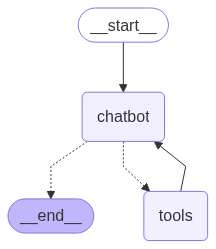

In [55]:
## 시각화
from IPython.display import Image
Image(graph.get_graph().draw_mermaid_png())

In [56]:
# 호출(invoke) -> 대화 ID를 config로 전달.
config = {"configurable":{"thread_id":"user-1"}} # [1]
user_input = "내 이름은 홍길동입니다."
init_state = {"messages": [HumanMessage(content=user_input)]}
response = graph.invoke(init_state, config=config)

[1] runnable에게 전달해주는 값이다 => 딕셔너리를 씀. 전달해주는 값이 딕셔너리라서 딕셔너리 안에 딕셔너리가 있는 거임.

In [57]:
response

{'messages': [HumanMessage(content='내 이름은 홍길동입니다.', additional_kwargs={}, response_metadata={}, id='8aa50d71-7a85-4b10-83e9-4d19176e4af5'),
  AIMessage(content='안녕하세요, 홍길동님! 무엇을 도와드릴까요? 궁금한 점이나 필요한 정보가 있으시면 언제든 말씀해 주세요.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 33, 'prompt_tokens': 349, 'total_tokens': 382, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-2025-04-14', 'system_fingerprint': 'fp_b3f1157249', 'id': 'chatcmpl-BlRGtKOpyu7dgJGrazvuctmMwNagI', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--38218c78-3cc9-48e8-8ef6-ab100743920d-0', usage_metadata={'input_tokens': 349, 'output_tokens': 33, 'total_tokens': 382, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]

In [58]:
response2 = graph.invoke(
    {"messages":"내 이름의 한국 고전 소설이 있는지 확인해줘. 있으면 소개도 부탁해."},
    config=config # 대화 내역 유지
    )


In [59]:
response2

{'messages': [HumanMessage(content='내 이름은 홍길동입니다.', additional_kwargs={}, response_metadata={}, id='8aa50d71-7a85-4b10-83e9-4d19176e4af5'),
  AIMessage(content='안녕하세요, 홍길동님! 무엇을 도와드릴까요? 궁금한 점이나 필요한 정보가 있으시면 언제든 말씀해 주세요.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 33, 'prompt_tokens': 349, 'total_tokens': 382, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-2025-04-14', 'system_fingerprint': 'fp_b3f1157249', 'id': 'chatcmpl-BlRGtKOpyu7dgJGrazvuctmMwNagI', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--38218c78-3cc9-48e8-8ef6-ab100743920d-0', usage_metadata={'input_tokens': 349, 'output_tokens': 33, 'total_tokens': 382, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}),

In [61]:
response3 = graph.invoke(
    {"messages":"독산동에 맛있는 파스타집 추천해줘."},
    config=config
    )
response3

{'messages': [HumanMessage(content='내 이름은 홍길동입니다.', additional_kwargs={}, response_metadata={}, id='8aa50d71-7a85-4b10-83e9-4d19176e4af5'),
  AIMessage(content='안녕하세요, 홍길동님! 무엇을 도와드릴까요? 궁금한 점이나 필요한 정보가 있으시면 언제든 말씀해 주세요.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 33, 'prompt_tokens': 349, 'total_tokens': 382, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-2025-04-14', 'system_fingerprint': 'fp_b3f1157249', 'id': 'chatcmpl-BlRGtKOpyu7dgJGrazvuctmMwNagI', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--38218c78-3cc9-48e8-8ef6-ab100743920d-0', usage_metadata={'input_tokens': 349, 'output_tokens': 33, 'total_tokens': 382, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}),

ToolMessage가 있다는 것 == tool을 썼다는 것.

In [62]:
response4 = graph.invoke(
    {"messages":"두번째 식당 전화번호 알려줘."},
    config=config
    )
response4

{'messages': [HumanMessage(content='내 이름은 홍길동입니다.', additional_kwargs={}, response_metadata={}, id='8aa50d71-7a85-4b10-83e9-4d19176e4af5'),
  AIMessage(content='안녕하세요, 홍길동님! 무엇을 도와드릴까요? 궁금한 점이나 필요한 정보가 있으시면 언제든 말씀해 주세요.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 33, 'prompt_tokens': 349, 'total_tokens': 382, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-2025-04-14', 'system_fingerprint': 'fp_b3f1157249', 'id': 'chatcmpl-BlRGtKOpyu7dgJGrazvuctmMwNagI', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--38218c78-3cc9-48e8-8ef6-ab100743920d-0', usage_metadata={'input_tokens': 349, 'output_tokens': 33, 'total_tokens': 382, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}),

In [64]:
config2 = {"configurable": {"thread_id":"test1111"}}
res = graph.invoke({"messages":"내 이름 뭔지 기억해?"}, config=config2)
res

{'messages': [HumanMessage(content='내 이름 뭔지 기억해?', additional_kwargs={}, response_metadata={}, id='37c78ec0-4539-4b06-9140-d95f137228a0'),
  AIMessage(content='아쉽게도 저는 이전 대화에서 사용자의 이름을 저장하거나 기억하지 않아요. 혹시 이름을 다시 알려주실 수 있을까요? 알려주시면 더 친근하게 불러드릴 수 있어요!', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 48, 'prompt_tokens': 345, 'total_tokens': 393, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-2025-04-14', 'system_fingerprint': 'fp_b3f1157249', 'id': 'chatcmpl-BlRN8u5zlp6YPnbMelGzE2EeqOM6Z', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--c47f55b1-d21a-4b93-8588-ed60fa25c49b-0', usage_metadata={'input_tokens': 345, 'output_tokens': 48, 'total_tokens': 393, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'

대화 아이디가 다름 => 새로운 대화가 되는 거다!

In [65]:
res = graph.invoke({"messages":"내 이름 뭔지 기억해?"}, config=config)
res

{'messages': [HumanMessage(content='내 이름은 홍길동입니다.', additional_kwargs={}, response_metadata={}, id='8aa50d71-7a85-4b10-83e9-4d19176e4af5'),
  AIMessage(content='안녕하세요, 홍길동님! 무엇을 도와드릴까요? 궁금한 점이나 필요한 정보가 있으시면 언제든 말씀해 주세요.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 33, 'prompt_tokens': 349, 'total_tokens': 382, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-2025-04-14', 'system_fingerprint': 'fp_b3f1157249', 'id': 'chatcmpl-BlRGtKOpyu7dgJGrazvuctmMwNagI', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--38218c78-3cc9-48e8-8ef6-ab100743920d-0', usage_metadata={'input_tokens': 349, 'output_tokens': 33, 'total_tokens': 382, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}),

이름을 기억하고 있다~

---
질문. 위 코드는 단순히 tool calling이 아니고 Agent인가요?


답변.

이건 단순한 **Tool Calling**이 아니라, **Agent**입니다.
말 그대로 **“툴을 쓸지 말지 스스로 결정하고, 필요하면 실제로 호출까지 해주는”** 능동적인 시스템이기 때문입니다.

---

## ✅ 용어 정리

| 용어               | 의미                                                            | 당신이 작성한 코드에서                                           |
| ---------------- | ------------------------------------------------------------- | ------------------------------------------------------ |
| **Tool Calling** | 툴을 어떻게 쓸지는 미리 정해놓고, 모델은 단순히 "이걸 써야 해요"라고 말만 함. 실제 실행은 외부에서 처리 | `tool_calls`로 툴 사용 의사 표시                               |
| **Agent**        | 툴 사용 여부를 스스로 판단하고, 실제로 **툴을 호출해서** 결과까지 받아 다시 응답에 반영          | `tools_condition` → `tools 노드` → `다시 chatbot 노드` 순환 흐름 |

---

## ✅ 왜 Agent인가?

아래의 구조를 보면 알 수 있어요:

### 1. `chatbot_node` 내부

```python
response = self.chain.invoke({"query":input_state["messages"]})
```

* 여기서 모델은 **툴이 필요하다고 판단되면** `tool_calls`를 생성해요.

### 2. `tools_condition` 조건 분기

```python
workflow.add_conditional_edges("chatbot", tools_condition, {"tools":"tools", END:END})
```

* 모델이 tool\_calls를 생성했다면 → `tools` 노드로 이동

### 3. `tool_node` 실행

```python
tool_message = self.tools_by_name[tool_call['name']].invoke(tool_call)
```

* 실제로 툴을 **실행**함
* 툴의 응답을 `ToolMessage` 형태로 다시 `messages`에 저장

### 4. 다시 `chatbot_node`로 돌아감

```python
workflow.add_edge("tools", "chatbot")
```

* 툴 결과를 확인한 후 **최종 답변 생성**

즉, 모델은 단순히 어떤 도구를 써야 하는지를 판단하는 데 그치지 않고,
👉 **툴을 호출해서 나온 결과를 바탕으로** 다시 사용자에게 자연스러운 응답을 만들어내는 **루프를 갖춘 구조**예요.

---

## ✅ 요약하면

| 질문                            | 답변                               |
| ----------------------------- | -------------------------------- |
| 이건 단순 Tool Calling이야?         | ❌ 아니요                            |
| 모델이 툴을 선택해서 쓰기까지 하나요?         | ✅ 네, 완전한 Agent입니다                |
| LangGraph 구조상 그런 흐름이 가능한 건가요? | ✅ 예. 상태 기반 처리 + 조건부 분기 덕분에 가능합니다 |

---

## 🔄 전체 흐름 요약 (Agent Loop)

```
사용자 입력
   ↓
[chatbot] → tool_calls 있음? → [tools 실행] → 결과 받음 → [chatbot 재호출] → 최종 응답
   ↓
tool_calls 없음 → [END]
```

궁금하면 Agent와 Tool Calling의 차이, LangGraph 내 Agent loop 구조, 더 복잡한 상태관리 방식도 이어서 설명해줄게요.
